In [6]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import pandas as pd
import glob
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels
import seaborn as sns
import cmocean

In [10]:
MODEL_NAMES =["ACCESS-ESM1-5_ssp126", "ACCESS-ESM1-5_ssp245", "ACCESS-ESM1-5_ssp585","GFDL-ESM4_ssp126", "GFDL-ESM4_ssp245", "GFDL-ESM4_ssp585", "IPSL-CM6A-LR_ssp126", "IPSL-CM6A-LR_ssp245","IPSL-CM6A-LR_ssp585","UKESM1-0-LL_ssp126", "UKESM1-0-LL_ssp245", "UKESM1-0-LL_ssp585"]

DS = []
for model_name in MODEL_NAMES:
    path_process = '/A04/so_data/CNN_data/global_processed/'
    ds = xr.open_dataset(path_process + model_name + '_r1i1p1f1_gr_201501-210012_processed.nc')
    ds = ds.sel(latitude=slice(-85, -30))
    DS.append(ds)
    print(model_name)

ACCESS-ESM1-5_ssp126
ACCESS-ESM1-5_ssp245
ACCESS-ESM1-5_ssp585
GFDL-ESM4_ssp126
GFDL-ESM4_ssp245
GFDL-ESM4_ssp585
IPSL-CM6A-LR_ssp126
IPSL-CM6A-LR_ssp245
IPSL-CM6A-LR_ssp585
UKESM1-0-LL_ssp126
UKESM1-0-LL_ssp245
UKESM1-0-LL_ssp585


In [11]:
var_input = ['zos','tos','rsds','uas','mlotst', 'siconc']

## Plot monthly

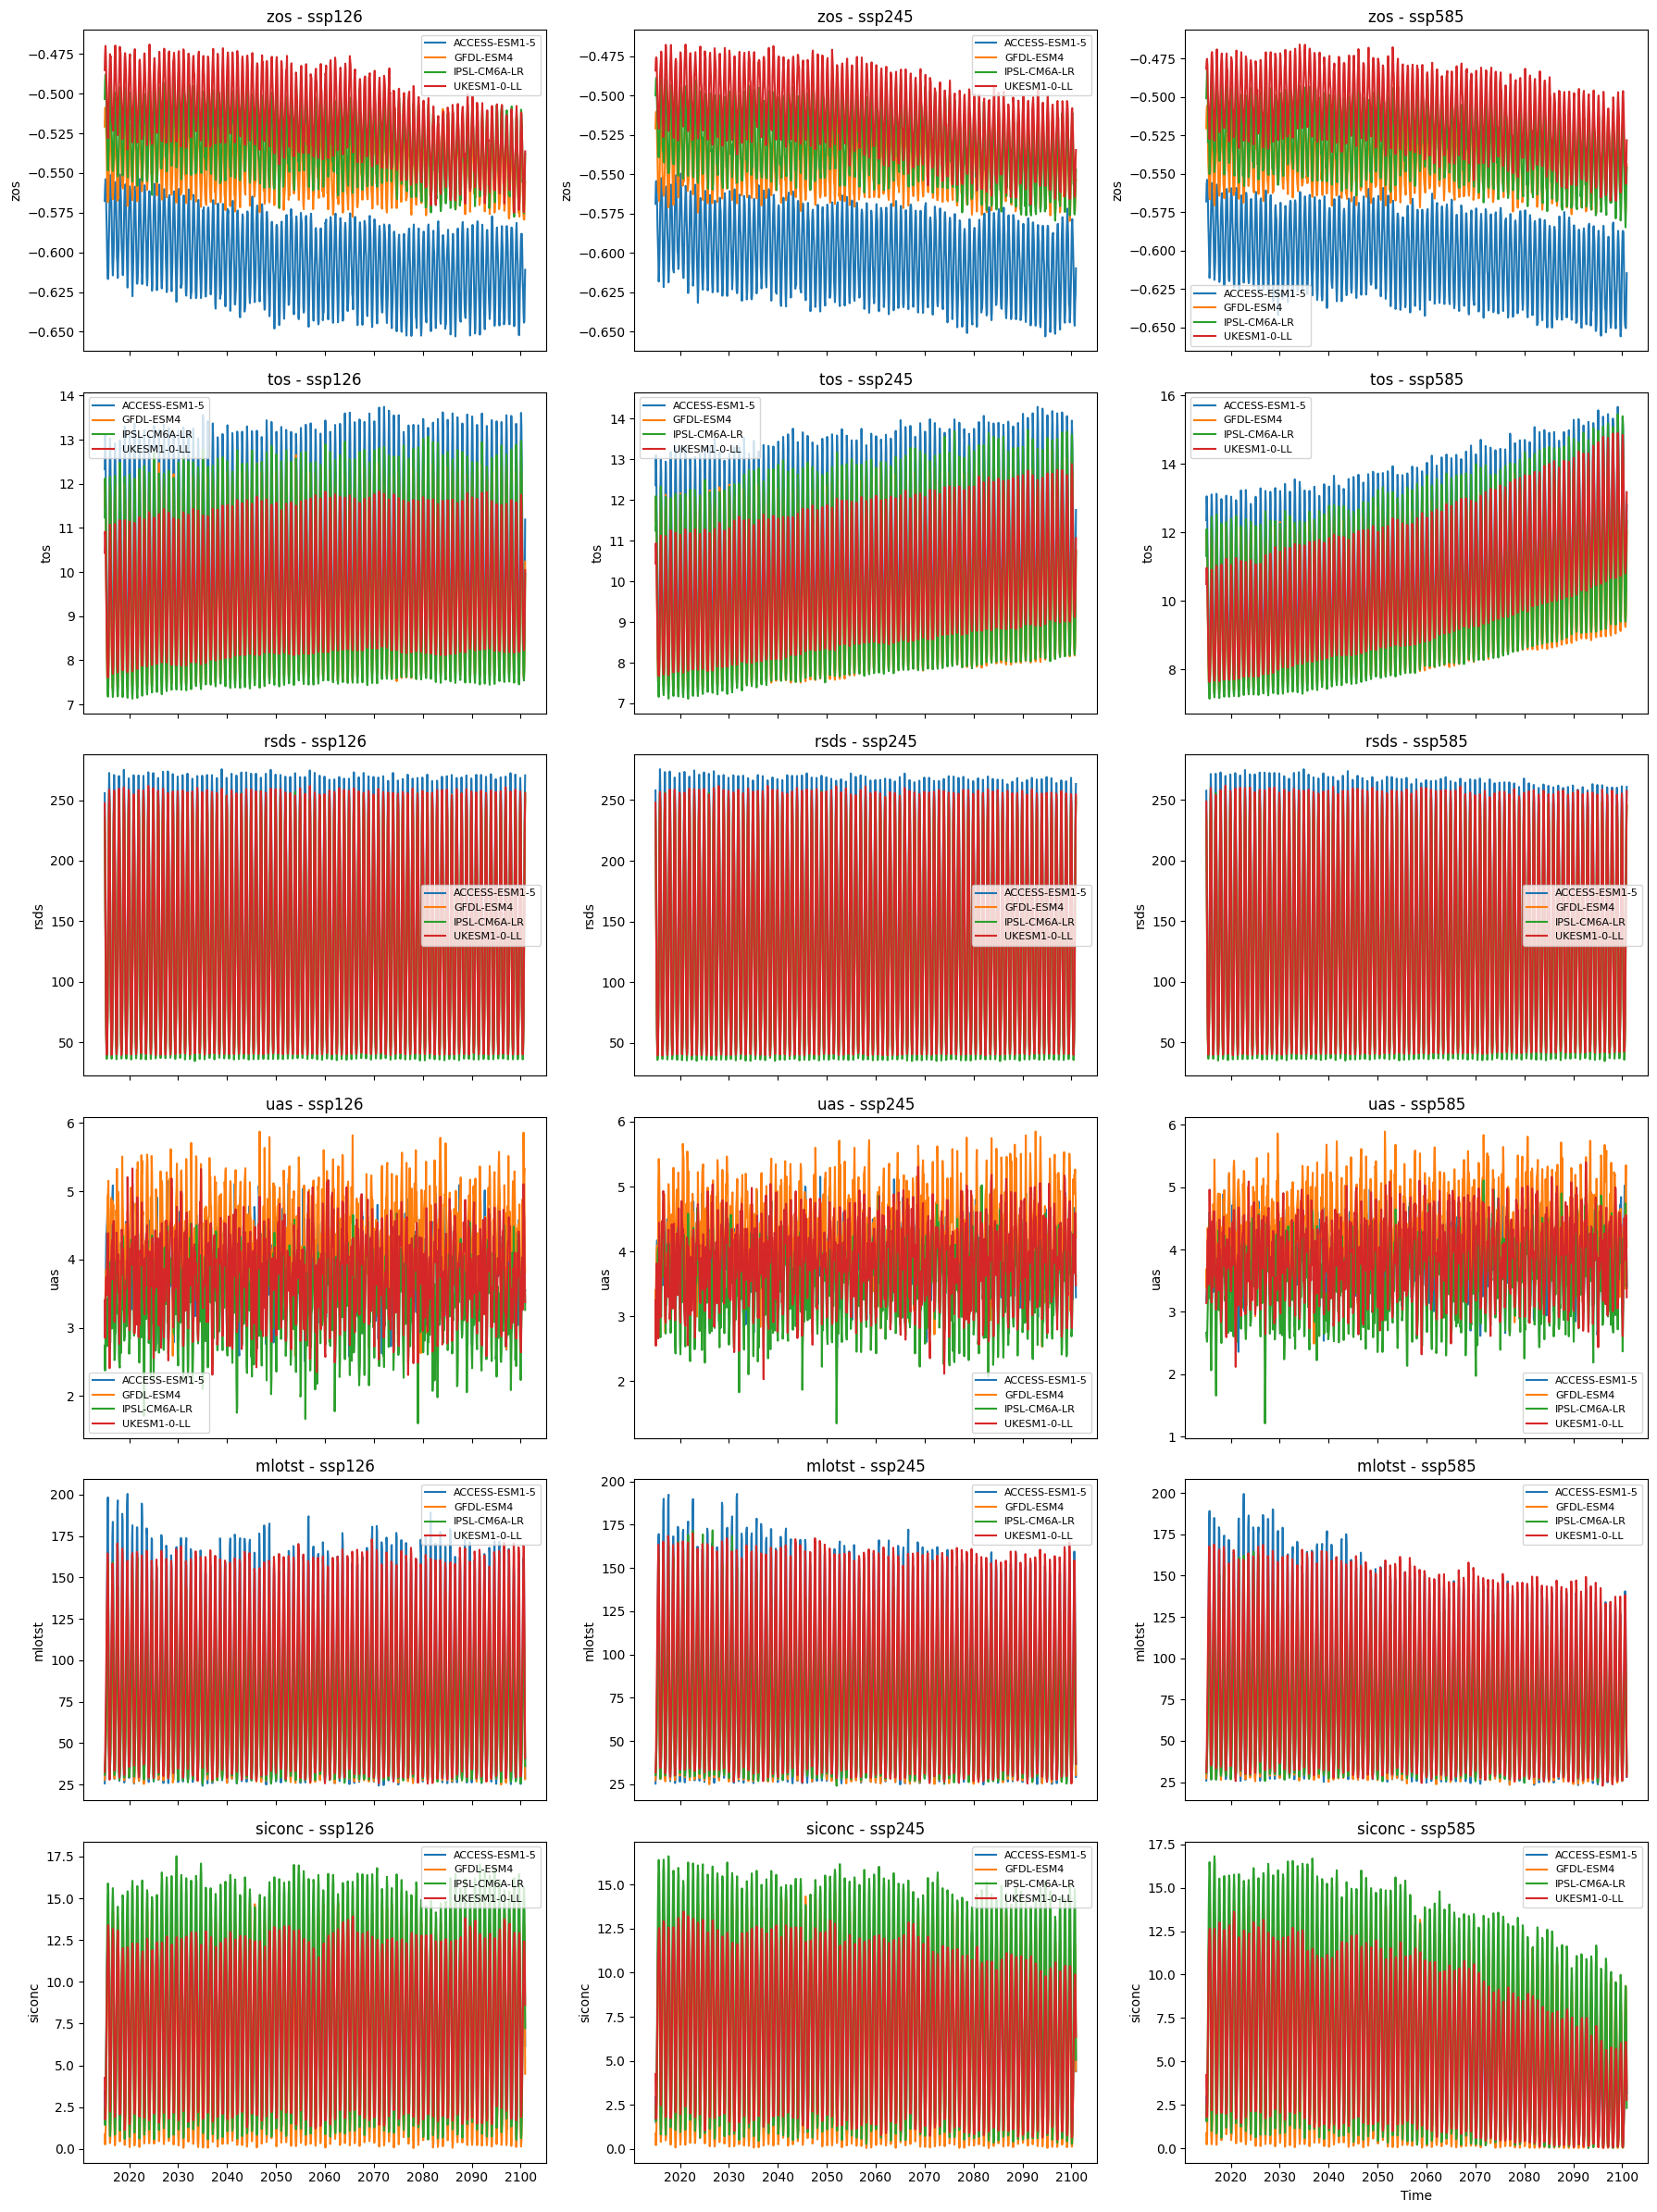

In [18]:
fig, axes = plt.subplots(6, 3, figsize=(18, 24), sharex=True, sharey=False)
ssp_labels = ['ssp126', 'ssp245', 'ssp585']
model_prefixes = ['ACCESS-ESM1-5', 'GFDL-ESM4', 'IPSL-CM6A-LR', 'UKESM1-0-LL']


for v, var in enumerate(var_input):           # Loop over variables (rows)
    for i, ssp in enumerate(ssp_labels):      # Loop over SSPs (columns)
        ax = axes[v, i]
        for model_prefix in model_prefixes:
            idx = MODEL_NAMES.index(f"{model_prefix}_{ssp}")
            ds = DS[idx]
            # Calculate the weighted mean over latitude and longitude
            weights = np.cos(np.deg2rad(ds['latitude']))
            weights.name = "weights"
            weighted_mean = ds[var].weighted(weights).mean(dim=['latitude', 'longitude'])
            ax.plot(ds['time'], weighted_mean, label=model_prefix)
        ax.set_title(f"{var} - {ssp}")
        ax.set_ylabel(var)
        ax.legend(fontsize=8)
axes[-1, -1].set_xlabel('Time')
plt.tight_layout()
plt.show()

## Plot Yearly

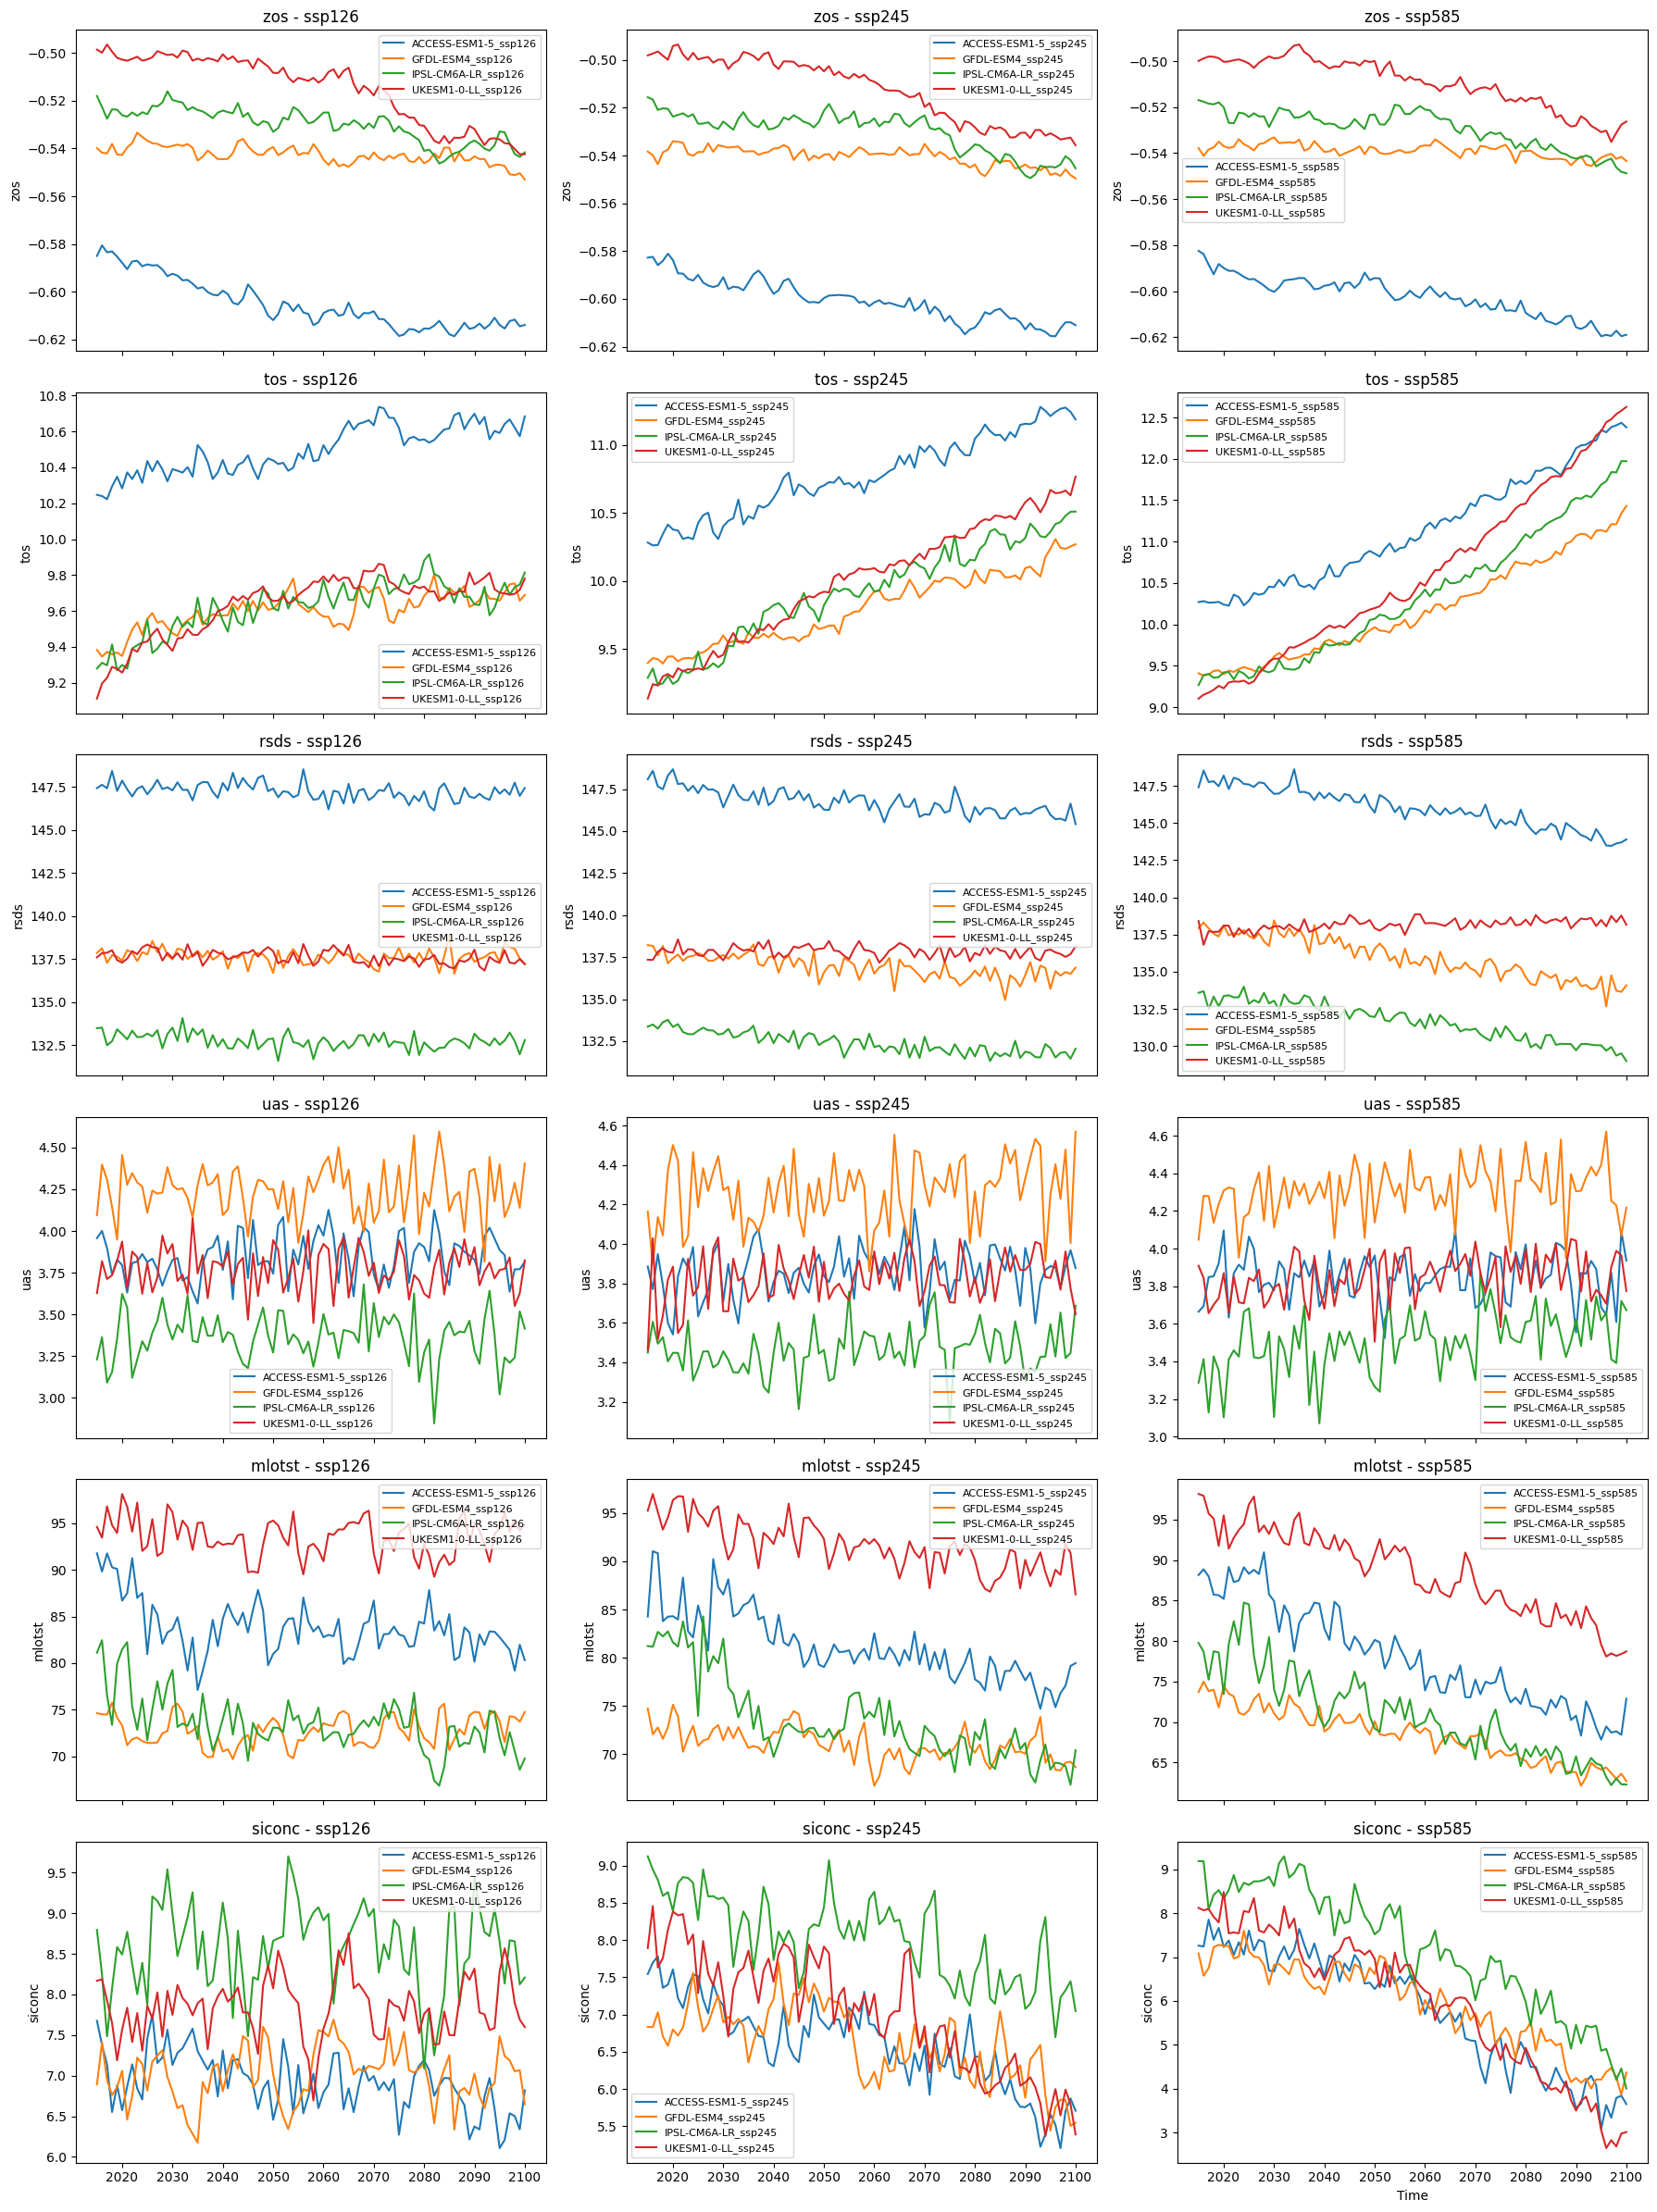

In [17]:
fig, axes = plt.subplots(6, 3, figsize=(18, 24), sharex=True, sharey=False)
ssp_labels = ['ssp126', 'ssp245', 'ssp585']
model_prefixes = ['ACCESS-ESM1-5', 'GFDL-ESM4', 'IPSL-CM6A-LR', 'UKESM1-0-LL']


for v, var in enumerate(var_input):           # Loop over variables (rows)
    for i, ssp in enumerate(ssp_labels):      # Loop over SSPs (columns)
        ax = axes[v, i]
        for model_prefix in model_prefixes:
            idx = MODEL_NAMES.index(f"{model_prefix}_{ssp}")
            ds = DS[idx]
            # Calculate the weighted mean over latitude and longitude
            weights = np.cos(np.deg2rad(ds['latitude']))
            weights.name = "weights"
            weighted_mean = ds[var].weighted(weights).mean(dim=['latitude', 'longitude'])
            yearly_mean = weighted_mean.resample(time='YS').mean()
            ax.plot(yearly_mean['time'], yearly_mean, label=f"{model_prefix}_{ssp}")
        ax.set_title(f"{var} - {ssp}")
        ax.set_ylabel(var)
        ax.legend(fontsize=8)
axes[-1, -1].set_xlabel('Time')
plt.tight_layout()
plt.show()
